# Описательная статистика. Меры центральной тенденции в Python

*Описательную статистику можно применять к одной переменной или к целому набору данных.*

*Мы рассмотрим её на примере следующего датасета:*

In [1]:
import pandas as pd
wine_data = pd.read_csv('data/wine_cleared.csv', sep=',')
display(wine_data)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


*Когда вы описываете и вычисляете характеристики одной переменной, вы выполняете* ***одномерный анализ.***

***Например, вы хотите узнать больше о сомелье, которые давали подробный отзыв вину. Вы анализируете признак независимо от других, как будто в датасете не существует других признаков. Вы можете просмотреть, сколько сомелье приняло участие в обзоре вин. Можете проанализировать информацию и увидеть, какой сомелье чаще всего оценивал вино. Возможно, эта информация будет важна, и на этапе проектирования и преобразования признаков мы обработаем признаки на основе этих выводов.***

*Когда вы анализируете пару переменных и больше, то вы делаете ***многомерный анализ.*** Целью такого анализа является нахождение связей между признаками.*

***Мы можем проанализировать, есть ли связь между сортом винограда и ценой бутылки вина. Для этого используется корреляционный анализ, с которым мы познакомимся в следующем юните. Для оценки рейтинга вина можем оценить статистическую значимость переменных, которую мы изучим в следующих модулях. Например, если цена за бутылку вина окажется неважным признаком, то мы сможем удалить его из датасета, так как он не влияет на рейтинг вина.***

*К одномерному анализу вы можете отнести вычисление максимальных и минимальных значений какого-либо признака, вычисление средних значений, часто встречающихся значений и размаха.*

*Начнём с более простого — вычисления максимума и минимума для признаков. Подобные вычисления вы проходили, изучая основы работы с библиотекой pandas. Примените эти знания в следующих заданиях!*

### Задание 2.1

*Вычислите наименьший балл за вино в датасете.*

In [5]:
display(wine_data['points'].min())

np.int64(80)

### Задание 2.2

*Вычислите наименьшую цену за бутылку в наборе данных.*

In [7]:
display(wine_data['price'].min())

np.float64(4.0)

***Вычисление среднего*** *также относится к одномерному анализу. Но что значит среднее?*

***Например, средняя зарплата в Краснодарском крае составляет 43 000 руб. Это число даёт нам представление о среднестатистическом жителе этого края.***

*Но что здесь означает средняя зарплата и среднестатистический житель? Среднее арифметическое, середина распределения или что-то другое? Чтобы ответить на этот вопрос, нам необходимо знать, что такое мера центральной тенденции.*

***Мера центральной тенденции*** *— это число, которое описывает так называемое «среднее» признака. Мера центральной тенденции может рассчитываться по-разному в зависимости от типа признака или от его распределения.*

*Далее мы рассмотрим наиболее популярные меры центральной тенденции, используемые в машинном обучении: среднее арифметическое, медиана, мода. Для расчёта этих описательных статистик в Python мы будем пользоваться библиотекой [statistics](https://docs.python.org/3/library/statistics.html). Она предоставляет готовые функции для вычисления математической статистики для числовых данных.*

***Импортируем библиотеку для дальнейшего использования***

In [9]:
import statistics

## Среднее арифметическое

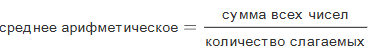

***Среднее арифметическое*** *— сумма всех элементов, поделённая на количество элементов в числовом ряду или признаке (Series).*

### Задание 2.3

Вычислите среднюю стоимость бутылки вина при помощи функции [statistics.mean()](https://docs.python.org/3/library/statistics.html#statistics.mean) библиотеки statistics. Округлите значение до сотых.

In [11]:
round(statistics.mean(wine_data['price']), 2)

35.36

In [13]:
display(round(wine_data['price'].mean(), 2))

np.float64(35.36)

## Задание 2.4

*Вычислите среднюю стоимость бутылки вина при помощи стандартных функций Python.*

*Вставьте получившийся код:*

In [14]:
mean = sum(wine_data['price']) / len(wine_data['price'])
print(mean)

35.363389129985535


***Среднее арифметическое*** *хорошо работает для признаков с небольшим разбросом в значениях, например чтобы корректно вычислять средний возраст популяции. Однако оно плохо работает для признака с большим разбросом в значениях.*

*Возьмём в пример рост человека. Если в выборке попадутся игроки баскетбольной команды или карлики, представление о среднем росте человека сильно исказится. Если таких значений в выборке будет мало, скорее всего, они будут обработаны на этапе очистки данных от выбросов. Если после очистки данных большой разброс останется, вы можете снова вернуться к этому этапу, так как цикл машинного обучения не линеен, или использовать другую описательную статистику для получения среднего значения.*

## Медиана

***Медиана*** *— средний элемент распределения. Для расчёта медианы должно выполняться одно условие: числовой ряд должен быть предварительно отсортирован. Только так мы сможем корректно рассчитать средний элемент. Признак может быть отсортирован как по возрастанию, так и по убыванию.*

*Методы современных библиотек, в том числе и используемой нами statistics для вычисления медианы, самостоятельно выполняют сортировку данных — вам не нужно заботиться об этом.*

*Если количество элементов чётное, медианой будет среднее арифметическое двух средних элементов распределения.*

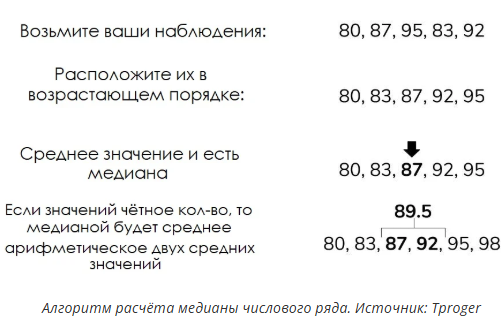

### Задание 2.5

*Вычислите медиану стоимости бутылки вина при помощи функции [statistics.median()](https://docs.python.org/3/library/statistics.html#statistics.median) библиотеки statistics. Округлите значение до сотых.*

In [56]:
statistics.median(wine_data['price'])

28.0

## Задание 2.6

*Вычислите медиану стоимости бутылки вина при помощи стандартных функций Python.*

*Вставьте получившийся код:*

In [ ]:
#Мое решеине (заведомо известно что количество элементов нечетное)
mask = wine_data.sort_values('price')
mask2 = int((len(mask)/2)-0.5)
display(mask['price'].iloc[mask2])

np.float64(28.0)

In [53]:
#Решение ментора (с помощью цикла устанавливаем четность или нечётность элементов)
count_price = len(wine_data['price']) # количество записей цен
sorted_price = sorted(wine_data['price']) # отсортированные цены

if count_price % 2: # при нечетном кол-ве элементов выбираем средний по индексу 
    median = sorted_price[round(0.5*(count_price-1))]
else: # при четном кол-ве элементов выбираем 2 средних по индексу и считаем между ними среднее арифметическое
    index = round(0.5 * count_price)
    median_ = 0.5 * (sorted_price[index-1] + sorted_price[index])
median

28.0

*В отличие от среднего арифметического медиана хорошо справляется с разбросом в значениях, поэтому её чаще используют. Также медиана разбивает данные на две группы, состоящие из одинакового количества элементов.*

*Средние значения, например уровень дохода или цена на недвижимость, часто вычисляются именно по медиане, потому что в этом случае важен средний уровень доходов большей части населения*

*В таком случае основатель Amazon Джефф Безосс с годовым доходом в несколько миллиардов не испортит нам всю статистику.*

*Также в библиотеке statistics есть функции, связанные с медианой, — функция [statistics.median_low()](https://docs.python.org/3/library/statistics.html#statistics.median_low) и функция [statistics.median_high()](https://docs.python.org/3/library/statistics.html#statistics.median_high).*

*В случае, когда количество элементов в числовом ряду (серии) нечётное, функции возвращают то же, что и median().*

*В случае, когда количество элементов чётное, у нас получается два средних значения:*

- ***median_low() возвращает меньшее из них;***

- ***median_high() возвращает большее из них.***

***Примечание.*** *Если в вашем наборе данных есть пропущенные значения, функции библиотеки statistics в отличие от других методов (например np.median() из библиотеки numpy) будут автоматически игнорировать пропущенные значения, не выдавая ошибку.*

## Мода

***Мода*** *— самое часто встречающееся значение в числовом или нечисловом ряду данных.*

*Допустим, вы решили полететь в отпуск со своими друзьями и решили выбрать месяц. Вы провели опрос, кому в какой месяц было бы удобнее. Месяцы в году — это числовой ряд от 1 до 12. Дима и Серёжа свободны в феврале. Толя может взять отпуск в любой месяц года, а Ксюша может только в июне. Как в этом случае поступите вы?*

*Очевидно, выберете месяц, который выбрало большинство; остальные подстроятся либо не полетят с вами.*

*Чаще всего мода используется ***в нечисловых рядах.*** Например самая популярная порода собак, фильм года, лучшие рестораны вычисляются именно модой.*

### Задание 2.7

*Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи функции statistics.mode() библиотеки statistics. Округлите значение до сотых.*

In [55]:
round(statistics.mode(wine_data['price']),2)

35.36

In [58]:
statistics.multimode(wine_data['price'])

[35.363389129985535]

*Моду также можно вычислить при помощи [statistics.multimode()](https://docs.python.org/3/library/statistics.html#statistics.multimode). В случае наличия нескольких модовых (популярных значений) функция statistics.mode() вернёт вам ошибку StatisticsError, а statistics.multimode() — список с всеми вычисленными модовыми значениями.*

## Задание 2.8

*Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи стандартных функций Python и pandas.*

*Вставьте получившийся код:*

In [67]:
wine_data['price'].mode()

0    35.363389
Name: price, dtype: float64

In [70]:
mode = round(wine_data["price"].value_counts().index[0],2)
print(mode)

35.36


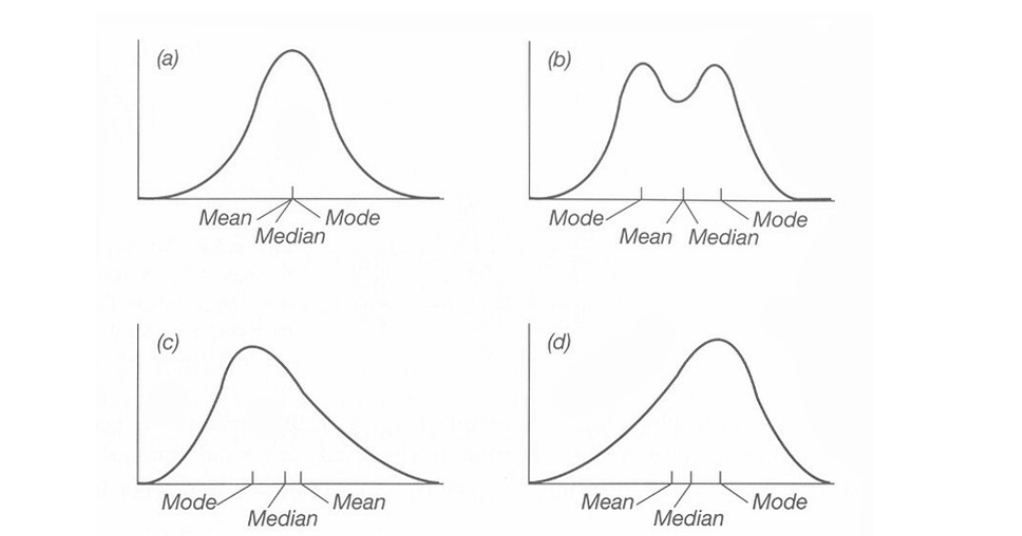

*На этих схематических графиках показано, как могут выглядеть гистограммы с различными формами распределения. На графиках a и b — симметричные распределения, c и d — несимметричные.*

*Мы рассмотрели самые основные и часто используемые в машинном обучении меры центральной тенденции. Также к мерам центральной тенденции относятся:*

- среднее геометрическое;
- среднее гармоническое;
- средневзвешенное и другие.

*Их также можно вычислить с помощью библиотеки statistics, но они реже используются для описания распределения в машинном обучении.*

*Такие более сложные описательные статистики, как стандартное отклонение, меры разброса, вы изучите в следующих юнитах, посвящённых математической статистике.*